In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

core_data = pd.read_excel('Copper_Core/Run 2_our result/Run_2_result_final.xlsx',index_col = None)
non_core_data = pd.read_excel('Non_Copper_Core/Run 3_our_result/Run_3_Result.xlsx',index_col = None)

core_data.columns = ['Pixel', 'Temperature (°C)']
non_core_data.columns = ['Pixel', 'Temperature (°C)']

r = 3 * 0.0254
pixel_to_meter_core = r/core_data.iloc[-1,0]
pixel_to_meter_non_core = r/non_core_data.iloc[-1,0]

# Insert the new column as a scalar multiple of Column1
core_data['Radial Distance (m)'] = core_data['Pixel'] * pixel_to_meter_core
non_core_data['Radial Distance (m)'] = non_core_data['Pixel'] * pixel_to_meter_non_core

# Reorder the columns to place 'NewColumn' between 'Column1' and 'Temperature (°C)'
core_data = core_data[['Pixel', 'Radial Distance (m)', 'Temperature (°C)']]
non_core_data = non_core_data[['Pixel', 'Radial Distance (m)', 'Temperature (°C)']]

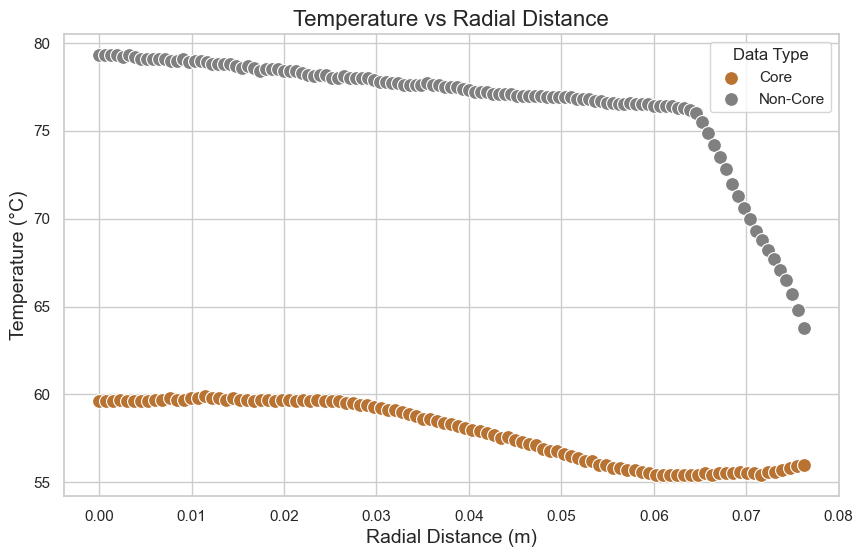

In [2]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot core data
sns.scatterplot(data=core_data, x='Radial Distance (m)', y='Temperature (°C)', color='#B87333', label='Core', s=100)

# Plot non-core data
sns.scatterplot(data=non_core_data, x='Radial Distance (m)', y='Temperature (°C)', color='grey', label='Non-Core', s=100)

# Set the title and labels
plt.title('Temperature vs Radial Distance', fontsize=16)
plt.xlabel('Radial Distance (m)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)

# Show the legend
plt.legend(title='Data Type')

# Show the plot
plt.show()

In [56]:
core_cost = 39.99 			
non_core_cost = 22.95 	

dt_to_cost_ratio_core = (core_data.iloc[0,2]-core_data.iloc[-1,2])/core_cost
dt_to_cost_ratio_non_core = (non_core_data.iloc[0,2]-non_core_data.iloc[-1,2])/non_core_cost
print(f"None core : T_max = {non_core_data.iloc[0,2]} K, T_min = {non_core_data.iloc[-1,2]} C")
print(f"Core : T_max = {core_data.iloc[0,2]} K, T_min = {core_data.iloc[-1,2]} C")

print(f"The Temperature difference per dollar for the core is {dt_to_cost_ratio_core:.4f} K/$")
print(f"The Temperature difference per dollar for the non copper core is {dt_to_cost_ratio_non_core:.4f} K/$")


# Calculate the mean and standard deviation for core data
mean_core = core_data['Temperature (°C)'].mean()
std_core = core_data['Temperature (°C)'].std()

# Calculate the Uniformity Index for core data
uniformity_index_core = std_core / mean_core if mean_core != 0 else np.nan

# Calculate the mean and standard deviation for non-core data
mean_non_core = non_core_data['Temperature (°C)'].mean()
std_non_core = non_core_data['Temperature (°C)'].std()

# Calculate the Uniformity Index for non-core data
uniformity_index_non_core = std_non_core / mean_non_core if mean_non_core != 0 else np.nan

# Display the results
print(f"Standard Deviation of Temperature for Core Data: {std_core:.4f}")
print(f"Mean of Temperature for Core Data: {mean_core:.4f}")
print(f"Standard Deviation of Temperature for Non-Core Data: {std_non_core:.4f}")
print(f"Mean of Temperature for Non-Core Data: {mean_non_core:.4f}")


# Display the results
print(f"Uniformity Index of Temperature for Core Data: {uniformity_index_core:.4f}")
print(f"Uniformity Index of Temperature for Non-Core Data: {uniformity_index_non_core:.4f}")




None core : T_max = 79.3 K, T_min = 63.8 C
Core : T_max = 59.6 K, T_min = 56.0 C
The Temperature difference per dollar for the core is 0.0900 K/$
The Temperature difference per dollar for the non copper core is 0.6754 K/$
Standard Deviation of Temperature for Core Data: 1.7603
Mean of Temperature for Core Data: 57.8673
Standard Deviation of Temperature for Non-Core Data: 3.2815
Mean of Temperature for Non-Core Data: 76.5664
Uniformity Index of Temperature for Core Data: 0.0304
Uniformity Index of Temperature for Non-Core Data: 0.0429


D = 1.52e-01
h = 3.00e-02
A = 1.82e-02
P = 4.79e-01
L = 3.81e-02
k_non_core = 1.43e+01
B_air = 3.09e-03
v_air = 1.83e-05
alpha_air = 2.60e-05
k_air = 2.81e-02
Pr_air = 7.04e-01
Ra_L = 1.83e+05
Nu_L = 1.12e+01
h_air = 8.22e+00 W m^-2 K^-1
q_conv = 4.25e+02 W m^-2
q_rad = 4.01e+02 W m^-2
q_gen = 1.25e+05 W m^-3
T_r_1 = 352.30 K
r_1 = 6.46e-04 m
T_r_edge = 336.80 K
r_edge = 7.62e-02 m
The average percent error is 4.91%
The maximum percent error is 11.23%


c:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


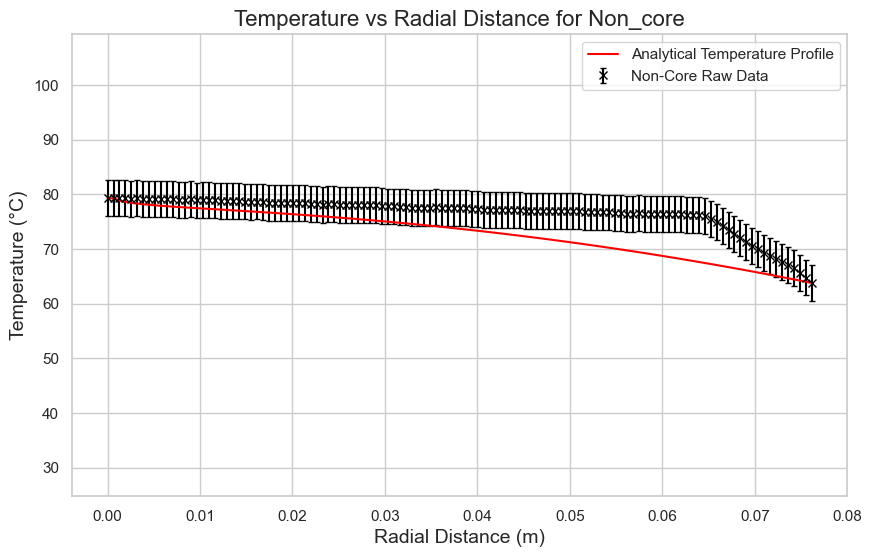

The T_inf is 24.80 C
The T_m is 76.57 C
The T_film is 50.68 C
The q_in total is 29.30 W
The q_in resistance is 3.20 W
The q_in to pan is 26.10 W
The square patch heater side length  is 7.546e-02 m
Thermal conductivity of the non-core material is 14.35 W m^-1 K^-1
The equation for the temperature profile is T(r) = -(2182.0169338954624 * r^2) + -5.93e-01 * ln(r) + 3.48e+02


In [57]:
##Analytical Section for non-core
#Materal properties from https://www.engineeringtoolbox.com/thermal-conductivity-metals-d_858.html

#Experimental Conditions
g = 9.81
sigma = 5.67*(10**-8)
epsilon = 1.00
a = 75.46 * (10**-3)
q_resistance = 3.2
q_total = 29.3
q = q_total- q_resistance
T_m = non_core_data['Temperature (°C)'].mean() + 273
T_inf = 24.8 + 273
T_film = (T_m + T_inf)/2

#Pan properties
h= 0.03
A = np.pi*(r**2)
P = 2*np.pi*r
L = A/P
k_non_core = 14.35 
print(f"D = {2*r:.2e}")
print(f"h = {h:.2e}")
print(f"A = {A:.2e}")
print(f"P = {P:.2e}")
print(f"L = {L:.2e}")
print(f"k_non_core = {k_non_core:.2e}")


#Air properties
T_1 = 300
T_2 = 350

v_1 = 15.89*(10**-6)
v_2 = 20.92*(10**-6)

alpha_1 =22.5*(10**-6)
alpha_2 =29.9*(10**-6)

k_1 = 26.3*(10**-3)
k_2 = 30.0*(10**-3)

Pr_1 = 0.707
Pr_2 = 0.700

B_air = 1/T_film
v_air = np.interp(T_film, [T_1,T_2], [v_1,v_2])
alpha_air = np.interp(T_film, [T_1,T_2], [alpha_1,alpha_2])
k_air = np.interp(T_film, [T_1,T_2], [k_1,k_2])
Pr_air = np.interp(T_film, [T_1,T_2], [Pr_1,Pr_2])


print(f"B_air = {B_air:.2e}")
print(f"v_air = {v_air:.2e}")
print(f"alpha_air = {alpha_air:.2e}")
print(f"k_air = {k_air:.2e}")
print(f"Pr_air = {Pr_air:.2e}")


Ra_L =  (g*B_air*(T_m-T_inf)*(L**3))/(v_air*alpha_air)

print(f"Ra_L = {Ra_L:.2e}")

if Ra_L >= 10**4 and Ra_L <= 10**7 and Pr_air >=0.7:
    Nu_L = 0.54*(Ra_L**(1/4))

if Ra_L > 10**7:
    Nu_L = 0.15*(Ra_L**(1/3))

print(f"Nu_L = {Nu_L:.2e}")

h_air = Nu_L*k_air/L

print(f"h_air = {h_air:.2e} W m^-2 K^-1")

q_conv = h_air*(T_m-T_inf)
q_rad = sigma*epsilon*((T_m**4)-(T_inf**4))
q_in = q/(a*a)
q_gen = -(q_conv + q_rad - q_in)/h

print(f"q_conv = {q_conv:.2e} W m^-2")
print(f"q_rad = {q_rad:.2e} W m^-2")
print(f"q_gen = {q_gen:.2e} W m^-3")

#Boundary condictions
T_r_1 = non_core_data.iloc[1]['Temperature (°C)'] + 273
r_1 = non_core_data.iloc[1]['Radial Distance (m)']
print(f"T_r_1 = {T_r_1:.2f} K")
print(f"r_1 = {r_1:.2e} m")

T_r_edge = non_core_data.iloc[-1]['Temperature (°C)'] + 273
r_edge = non_core_data.iloc[-1]['Radial Distance (m)']
print(f"T_r_edge = {T_r_edge:.2f} K")
print(f"r_edge = {r_edge:.2e} m")

#Solve for C1 and C2
A = np.array([[np.log(r_1), 1], [np.log(r_edge), 1]])
b = np.array([T_r_1 + (q_gen * r_1**2) / (4 * k_non_core), T_r_edge + (q_gen * r_edge**2) / (4 * k_non_core)])
C = np.linalg.solve(A, b)

C1 = C[0]
C2 = C[1]

temperature_profile_equation = f"T(r) = -({q_gen/(4 * k_non_core)} * r^2) + {C1:.2e} * ln(r) + {C2:.2e}"

r_range = non_core_data['Radial Distance (m)']
non_core_data["Temperature Profile (°C)"] = -(q_gen * r_range**2) / (4 * k_non_core) + C1 * np.log(r_range) + C2 - 273
non_core_data.loc[non_core_data["Temperature Profile (°C)"] == np.inf, "Temperature Profile (°C)"] = non_core_data.iloc[0]["Temperature (°C)"]
non_core_data.loc[non_core_data["Temperature Profile (°C)"] == -np.inf, "Temperature Profile (°C)"] = non_core_data.iloc[0]["Temperature (°C)"]
non_core_data["Error Bar (°C)"] = std_non_core
non_core_data["Percent Error (%)"] = np.abs((non_core_data["Temperature (°C)"] - non_core_data["Temperature Profile (°C)"])) / non_core_data["Temperature (°C)"] * 100
print(f"The average percent error is {non_core_data['Percent Error (%)'].mean():.2f}%")
print(f"The maximum percent error is {non_core_data['Percent Error (%)'].max():.2f}%")
# Set the style of seaborn
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))
# Plot non-core data
plt.errorbar(non_core_data['Radial Distance (m)'], non_core_data['Temperature (°C)'], 
            yerr=non_core_data['Error Bar (°C)'], fmt='x', color='black', capsize=2, label='Non-Core Raw Data')

plt.plot(non_core_data["Radial Distance (m)"],non_core_data["Temperature Profile (°C)"] , color='red', label=f'Analytical Temperature Profile')
# Set the title and labels
plt.title('Temperature vs Radial Distance for Non_core', fontsize=16)
plt.xlabel('Radial Distance (m)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.ylim(T_inf - 273,non_core_data["Temperature (°C)"].max()+30)

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(f"The T_inf is {T_inf - 273:.2f} C")
print(f"The T_m is {T_m - 273:.2f} C")
print(f"The T_film is {T_film - 273:.2f} C")
print(f"The q_in total is {q_total:.2f} W")
print(f"The q_in resistance is {q_resistance:.2f} W")
print(f"The q_in to pan is {q:.2f} W")
print(f"The square patch heater side length  is {a:.3e} m")
print(f"Thermal conductivity of the non-core material is {k_non_core:.2f} W m^-1 K^-1")
print(f"The equation for the temperature profile is {temperature_profile_equation}")

B_air = 3.18e-03
v_air = 1.73e-05
alpha_air = 2.46e-05
k_air = 2.74e-02
Pr_air = 7.05e-01
Ra_L = 1.34e+05
Nu_L = 1.03e+01
h_air = 7.42e+00 W m^-2 K^-1
q_conv = 2.45e+02 W m^-2
q_rad = 2.34e+02 W m^-2
q_gen = 1.37e+05 W m^-3
T_r_1 = 332.60 K
r_1 = 7.62e-04 m
T_r_edge = 329.00 K
r_edge = 7.62e-02 m
The average percent error is 1.35%
The maximum percent error is 3.81%


c:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


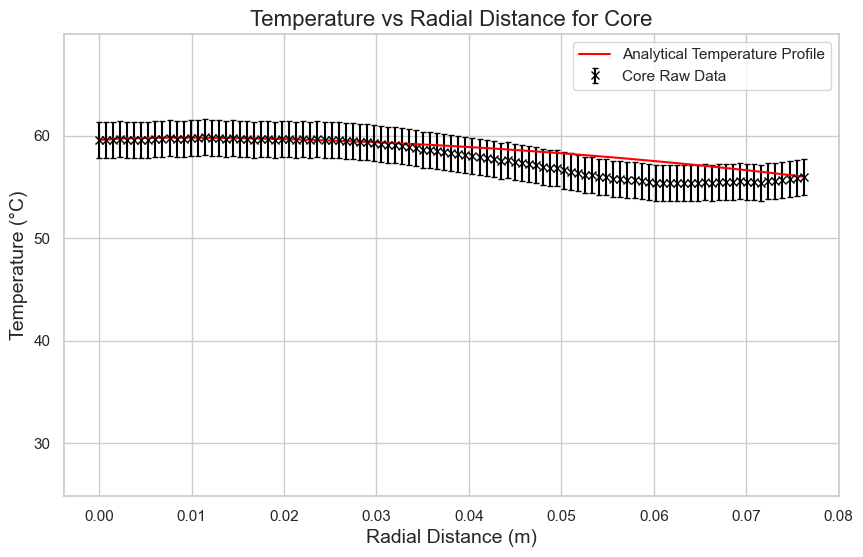

The T_inf is 24.80 C
The T_m is 57.87 C
The T_film is 41.33 C
The q_in total is 29.30 W
The q_in resistance is 3.20 W
The q_in to pan is 26.10 W
The square patch heater side length  is 7.546e-02 m
The thermal conductivity of the copper core pan is 48.67 W m^-1 K^-1
The equation for the temperature profile is T(r) = -(702.7574972672322 * r^2) ) + 1.04e-01 * ln(r) + 3.33e+02


In [58]:
##Analytical Section for core
#Materal properties from https://www.engineeringtoolbox.com/thermal-conductivity-metals-d_858.html

#Experimental Conditions
g = 9.81
sigma = 5.67*(10**-8)
epsilon = 1.00
a = 75.46*(10**-3)
q_resistance = 3.2
q_total = 29.3
q = q_total- q_resistance
T_m = core_data['Temperature (°C)'].mean() + 273
T_inf = 24.8 + 273
T_film = (T_m + T_inf)/2

#Pan properties
h= 0.03
A = np.pi*(r**2)
P = 2*np.pi*r
L = A/P
k_copper = 83
k_core = (k_copper + k_non_core)/2


#Air properties
T_1 = 300
T_2 = 350

v_1 = 15.89*(10**-6)
v_2 = 20.92*(10**-6)

alpha_1 =22.5*(10**-6)
alpha_2 =29.9*(10**-6)

k_1 = 26.3*(10**-3)
k_2 = 30.0*(10**-3)

Pr_1 = 0.707
Pr_2 = 0.700

B_air = 1/T_film
v_air = np.interp(T_film, [T_1,T_2], [v_1,v_2])
alpha_air = np.interp(T_film, [T_1,T_2], [alpha_1,alpha_2])
k_air = np.interp(T_film, [T_1,T_2], [k_1,k_2])
Pr_air = np.interp(T_film, [T_1,T_2], [Pr_1,Pr_2])


print(f"B_air = {B_air:.2e}")
print(f"v_air = {v_air:.2e}")
print(f"alpha_air = {alpha_air:.2e}")
print(f"k_air = {k_air:.2e}")
print(f"Pr_air = {Pr_air:.2e}")


Ra_L =  (g*B_air*(T_m-T_inf)*(L**3))/(v_air*alpha_air)

print(f"Ra_L = {Ra_L:.2e}")

if Ra_L >= 10**4 and Ra_L <= 10**7 and Pr_air >=0.7:
    Nu_L = 0.54*(Ra_L**(1/4))

if Ra_L > 10**7:
    Nu_L = 0.15*(Ra_L**(1/3))

print(f"Nu_L = {Nu_L:.2e}")

h_air = Nu_L*k_air/L

print(f"h_air = {h_air:.2e} W m^-2 K^-1")

q_conv = h_air*(T_m-T_inf)
q_rad = sigma*epsilon*((T_m**4)-(T_inf**4))
q_in = q/(a*a)
q_gen = -(q_conv + q_rad - q_in)/h

print(f"q_conv = {q_conv:.2e} W m^-2")
print(f"q_rad = {q_rad:.2e} W m^-2")
print(f"q_gen = {q_gen:.2e} W m^-3")

#Boundary condictions
T_r_1 = core_data.iloc[1]['Temperature (°C)'] + 273
r_1 = core_data.iloc[1]['Radial Distance (m)']
print(f"T_r_1 = {T_r_1:.2f} K")
print(f"r_1 = {r_1:.2e} m")

T_r_edge = core_data.iloc[-1]['Temperature (°C)'] + 273
r_edge = core_data.iloc[-1]['Radial Distance (m)']
print(f"T_r_edge = {T_r_edge:.2f} K")
print(f"r_edge = {r_edge:.2e} m")


#Solve for C1 and C2
A = np.array([[np.log(r_1), 1], [np.log(r_edge), 1]])
b = np.array([T_r_1 + (q_gen * r_1**2) / (4 * k_core), T_r_edge + (q_gen * r_edge**2) / (4 * k_core)])
C = np.linalg.solve(A, b)

C1 = C[0]
C2 = C[1]

temperature_profile_equation = f"T(r) = -({q_gen/(4*k_core)} * r^2) ) + {C1:.2e} * ln(r) + {C2:.2e}"

r_range = core_data['Radial Distance (m)']
core_data["Temperature Profile (°C)"] = -(q_gen * r_range**2) / (4 * k_core) + C1 * np.log(r_range) + C2 - 273
core_data.loc[core_data["Temperature Profile (°C)"] == np.inf, "Temperature Profile (°C)"] = core_data.iloc[0]["Temperature (°C)"]
core_data.loc[core_data["Temperature Profile (°C)"] == -np.inf, "Temperature Profile (°C)"] = core_data.iloc[0]["Temperature (°C)"]
core_data["Error Bar (°C)"] = std_core
core_data["Percent Error (%)"] = np.abs((core_data["Temperature (°C)"] - core_data["Temperature Profile (°C)"])) / core_data["Temperature (°C)"] * 100

print(f"The average percent error is {core_data['Percent Error (%)'].mean():.2f}%")
print(f"The maximum percent error is {core_data['Percent Error (%)'].max():.2f}%")

# Set the style of seaborn
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))
# Plot non-core data with error bars
plt.errorbar(core_data['Radial Distance (m)'], core_data['Temperature (°C)'], 
            yerr=core_data['Error Bar (°C)'], fmt='x', color='black', capsize=2, label='Core Raw Data')
plt.plot(core_data["Radial Distance (m)"],core_data["Temperature Profile (°C)"] , color='red', label='Analytical Temperature Profile')
             
# Set the title and labels
plt.title('Temperature vs Radial Distance for Core', fontsize=16)
plt.xlabel('Radial Distance (m)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.ylim(T_inf - 273,core_data["Temperature (°C)"].max()+10)

# Show the legend
plt.legend()

# Show the plot
plt.show()

print(f"The T_inf is {T_inf - 273:.2f} C")
print(f"The T_m is {T_m - 273:.2f} C")
print(f"The T_film is {T_film - 273:.2f} C")
print(f"The q_in total is {q_total:.2f} W")
print(f"The q_in resistance is {q_resistance:.2f} W")
print(f"The q_in to pan is {q:.2f} W")
print(f"The square patch heater side length  is {a:.3e} m")
print(f"The thermal conductivity of the copper core pan is {k_core:.2f} W m^-1 K^-1")
print(f"The equation for the temperature profile is {temperature_profile_equation}")